In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp '/content/drive/MyDrive/Kaggle/kaggle.json' '/content'

In [3]:
import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [4]:
!kaggle datasets download -d vivek468/superstore-dataset-final

  0% 0.00/550k [00:00<?, ?B/s]
100% 550k/550k [00:00<00:00, 79.0MB/s]


In [5]:
zip_ref = zipfile.ZipFile('/content/superstore-dataset-final.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /content folder
zip_ref.close()

**About Dataset**
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

Metadata

*Row ID*=> Unique ID for each row.

*Order ID* => Unique Order ID for each Customer.

*Order Date*=> Order Date of the product.

*Ship Date* => Shipping Date of the Product.

*Ship Mode*=> Shipping Mode specified by the Customer.

*Customer ID* => Unique ID to identify each Customer.

*Customer Name* => Name of the Customer.

*Segment* => The segment where the Customer belongs.

*Country* => Country of residence of the Customer.

*City *=> City of residence of of the Customer.

*State* => State of residence of the Customer.

*Postal Code* => Postal Code of every Customer.

*Region* => Region where the Customer belong.

*Product ID*=> Unique ID of the Product.

*Category* => Category of the product ordered.

*Sub-Category* => Sub-Category of the product ordered.

*Product Name* => Name of the Product

*Sales*=> Sales of the Product.

*Quantity*=> Quantity of the Product.

*Discount* => Discount provided.

*Profit* => Profit/Loss incurred.


Lets try to give answers to the superstore as what can be done to improve their performance.

In [6]:
import pandas as pd
df = pd.read_csv('/content/Sample - Superstore.csv', encoding = 'windows-1252' )
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

No Null values to be taken care of...

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Sales vs other parameters

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

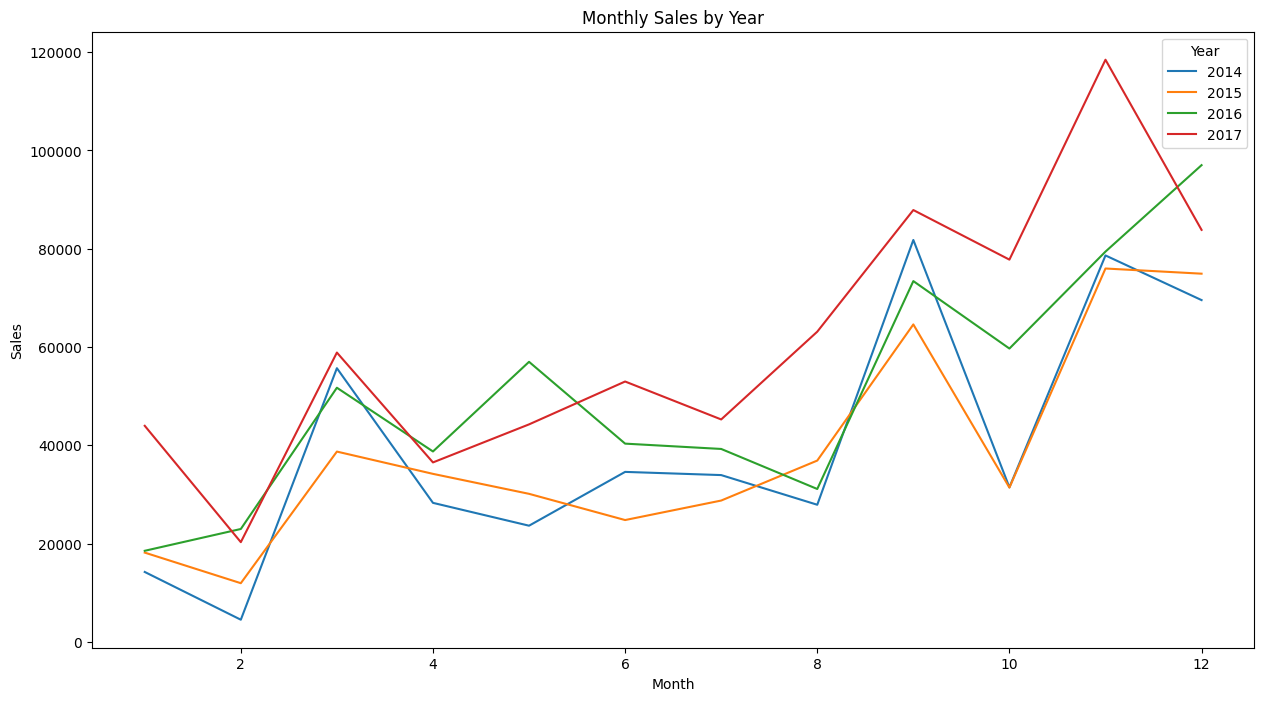

In [13]:

# Convert 'Order Date' column to datetime if it's not already in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Create a new column for the year of the order
df['Year'] = df['Order Date'].dt.year


# Create a new column for the month of the order
df['Month'] = df['Order Date'].dt.month

# Group the data by year and month and sum the sales
yearly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize = (15,8))
# Create a line chart with different colors for each year
for year in yearly_sales['Year'].unique():
    year_data = yearly_sales[yearly_sales['Year'] == year]  #give data for particular year
    plt.plot(year_data['Month'], year_data['Sales'], label=str(year))  #plot for the particular year


# Adding a legend to differentiate years by line color
plt.legend(title='Year')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales by Year')

# Show the plot
plt.show()


In [15]:
import pandas as pd
import plotly.express as px
# Group the data by day and count the number of unique order IDs for each day
orders_per_month = df.groupby('Month')['Order ID'].nunique().reset_index()

# Calculate the average number of orders per day
avg_orders_per_month = orders_per_month['Order ID'].mean()

figure = px.bar(orders_per_month, x='Month', y='Order ID',
             title='Average Number of Orders per Month',
             labels={'Month': 'Month', 'Order ID': 'Number of Orders'},
            color_discrete_sequence=['cadetblue']
             )

figure.show()

**From the two graphs above we can draw two conclusions:**

1: The sales of the superstore are seasonal, with the highest peak in November and December due to the holiday season. While as September is the start of the fall season, which could trigger more demand for certain products, such as furniture, office supplies, or technology items which can explain why there is a surge in sales in the month of September. This implies that the superstore should prepare enough inventory and staff for these months to meet the high demand and avoid stockouts or delays.

As for the months of january and february where the sales are low, company needs to offer more discounts & promotions, launch new products etc. so as to increase the customer flow.

2: From the last four years it can be seen that overall sales have gone up.This indicates that the superstore has improved its sales performance over the years, but there is still room for further improvement and growth.

In [16]:
#Create a new column for the day of the order
df['Day'] = df['Order Date'].dt.day

# Group the data by day and count the number of unique order IDs for each day
orders_per_day = df.groupby('Day')['Order ID'].nunique().reset_index()

# Calculate the average number of orders per day
avg_orders_per_day = orders_per_day['Order ID'].mean()


figure = px.line(orders_per_day, x='Day', y='Order ID',
             title='Average Number of Orders per Day',
             labels={'Day': 'Day', 'Order ID': 'Number of Orders'},
                color_discrete_sequence = ['mediumseagreen']
             )

figure.show()



On a daily basis, we see that there is a constant increase and decrease of sales per day...However it can be seen that at the end of every month there seems to a drop in the sales. There needs to be more investigation to be done there.

### Orders vs states

In [17]:
# Group the data by state and count the number of orders
orders_per_state = df.groupby('State')['Order ID'].count().reset_index()

# Sort the data to identify states with the highest orders
orders_per_state_sorted = orders_per_state.sort_values(by='Order ID', ascending=False)


fig = px.bar(orders_per_state_sorted, x='State', y='Order ID',
             title='Number of Orders per State in Superstore Dataset',
             labels={'State': 'State', 'Order ID': 'Number of Orders'})

fig.show()


In [ ]:
# Group the data by state and sum all the sales
profit_per_state = df.groupby('State')['Sales'].sum().reset_index()

# Sort the data to identify states with the most sales
profit_per_state_sorted = profit_per_state.sort_values(by='Sales', ascending=False)


fig = px.bar(profit_per_state_sorted , x='State', y='Sales',
             title='Sales Made in Each State',
             labels={'State': 'State', 'Sales': 'Sales Made ($)'},
             color_discrete_sequence = ['mediumorchid'])

fig.show()

 The top three states by sales and orders taken are California, New York, and Texas, which together account for more than 50% of the total sales. This suggests that the superstore has a strong presence and customer base in these states. They could improve customer service and satisfaction in these states by providing timely and quality support and feedback to the customers in each state.

However, this also means that the superstore may be missing out on opportunities in other states where the sales are low or negligible. For example, the bottom three states by sales are North Dakota, West Virginia, and Maine, which together account for less than 1% of the total sales34. This could indicate that the superstore has a weak or no presence in these states, or that the customers in these states have different preferences or needs.

They can conduct market research and analysis to understand the demographics, preferences, and behavior of the potential customers in these states.
Develop and implement marketing strategies and campaigns that are tailored to the specific needs and characteristics of each of these states and
expand the product portfolio and offer a variety of products that cater to the different tastes and preferences of the customers in each of these states.

### Products bought the most vs most profitable products.

In [18]:

# Group the data by Category and count the number of orders
products_bought = df.groupby('Category')['Order ID'].count().reset_index()

# Sort the data to identify states with the highest orders
products_bought_sorted = products_bought.sort_values(by='Order ID', ascending=False)

# Create a bar plot using Plotly Express

fig = px.bar(products_bought_sorted, x='Category', y='Order ID',
             title='Number of Products bought per category',
             labels={'Product': 'Product Name', 'Order ID': 'Number of Orders'})

fig.update_layout(width=800, height=500)
fig.show()

In [23]:

# Group the data by Sales and sum them up
profit_per_category = df.groupby('Category')['Sales'].sum().reset_index()

# Sort the data to identify category that made highest number of sales
profit_per_category_sorted = profit_per_category.sort_values(by='Sales', ascending=False)

fig = px.bar(profit_per_category_sorted , x='Category', y='Sales',
             title='Sales Made Per Category',
             labels={'Category': 'Category Name', 'Sales': 'Sales Made ($)'},
             color_discrete_sequence = ['pink'])
fig.update_layout(width=800, height=500)
fig.show()

It seems that although most orders received were of office supplies, the maximum sales were made in the technology category and the minimum sales in office supplies. This could imply that the office supplies products have a lower price and a higher demand, while the technology products have a higher price and a lower demand.

This is something we can get it from the fact that office supplies include items such as paper, envelops, copier etc. Now these items are more in demand but have a less price when compared to furniture and technology which includes phones etc. They have a high cost, thats why they can have more impact on the sales.

Just to give more insights into what sub categories are there and which among them are contributing more to sales.

In [19]:

# Group the data by sub category and count the number of orders
products_bought = df.groupby('Sub-Category')['Order ID'].count().reset_index()

# Sort the data to identify products/sub category with the highest orders
products_bought_sorted = products_bought.sort_values(by='Order ID', ascending=False)

fig = px.bar(products_bought_sorted, x='Sub-Category', y='Order ID',
             title='Number of Products bought per sub-category',
             labels={'Sub-Category': 'Product Name', 'Order ID': 'Number of Orders'},
              color_discrete_sequence=px.colors.qualitative.Set3)


fig.show()

In [24]:

# Group the data by products and sum up the sales for each product
profit_per_product = df.groupby('Sub-Category')['Sales'].sum().reset_index()

# Sort the data to identify products with highest sales
profit_per_product_sorted = profit_per_product.sort_values(by='Sales', ascending=False)

fig = px.bar(profit_per_product_sorted , x='Sub-Category', y='Sales',
             title='Sales Made Per Product',
             labels={'Sub-Category': 'Product', 'Sales': 'Sales Made ($)'},
             color_discrete_sequence = ['orange'])
fig.update_layout(width=1000, height=500)
fig.show()

### Sales vs profit

In [25]:
correlation = df['Sales'].corr(df['Profit'])  #correlation b/w the two terms

print("Correlation coefficient between Sales and Profit:", correlation)


Correlation coefficient between Sales and Profit: 0.4790643497377062


In [27]:
#make a new df consisting of sales and profit columns
sales_vs_profit = df[['Sales', 'Profit']]

# Create a scatter plot of sales vs profit
fig = px.scatter(sales_vs_profit, x="Sales", y="Profit", title="Sales vs Profit",
labels = {'Profit' : ' Profit', 'Sales' : 'Sales($)'})
fig.show()

The correlation between sales and profit is 0.48, indicating a moderate positive relationship.

The graph above needs to be analysed further as there are number of products for which there is a negative relation between sales and profit.

The graph below expands this concept.

In [28]:

# Create a bubble chart of sales vs profit
fig = px.scatter(df, x="Sales", y="Profit", size="Quantity", color="Category", title="Sales vs Profit by Category and Quantity",
                 labels = {'Profit' : ' Profit', 'Sales' : 'Sales($)'})

fig.show()


So from the bubble chart it is quite clear that the technology category products are bringing in more profit than the other two. This we saw in the earlier graphs also.

Now for the Office supplies there are a number of products that form a -ve relation between sales and profit. Store needs to look into that and take action so as to improve profit vs sales correlation.

### Discount vs Sales

In [21]:
discount_vs_profit_corr = df["Discount"].corr(df['Sales'])
discount_vs_profit_corr

-0.028190124157535506

In [30]:
discount_vs_profit = df[['Discount', 'Sales']]
fig = px.scatter(discount_vs_profit , x = 'Discount', y = 'Sales',
                 labels = {'Sales' : ' Sales($)', 'Discount' : 'Discount'})
fig.show()

The correlation between discount and sales in the superstore dataset is -0.028, which is very close to zero. This means that there is almost no linear relationship between discount and sales in the superstore dataset. In other words, changing the discount amount does not have a significant impact on the sales amount.

This could imply that the customers of the superstore are not very sensitive to the price changes, or that the discounts offered by the superstore are not large enough to influence the customer behavior. It could also suggest that other factors, such as product quality, customer service, or brand loyalty, are more important than price for the customers of the superstore.

### Customer Retention

In [ ]:
import pandas as pd


# Group the data by Customer ID and count the number of unique orders for each customer
customer_orders = df.groupby('Customer ID')['Order ID'].nunique().reset_index()

# Filter for customers who have shopped more than twice
repeat_customers = customer_orders[customer_orders['Order ID'] > 5]

# Calculate the number of retained customers
num_retained_customers = len(repeat_customers)

# Calculate the total number of unique customers
total_unique_customers = len(customer_orders)

# Calculate customer retention percentage
retention_percentage = (num_retained_customers / total_unique_customers) * 100

print("Number of retained customers:", num_retained_customers)
print("Total unique customers:", total_unique_customers)
print("Customer retention percentage:", retention_percentage)


Number of retained customers: 464
Total unique customers: 793
Customer retention percentage: 58.51197982345523


Customer retention percentage is 58% when each customer has purchased something  more than 5 times. This is quite good for the store, but can be improved also.

Based on the analysis above, more insights can also be drawn.